# 7) Statistical Tests

Vitor Kamada

econometrics.methods@gmail.com

Last updated 7-22-2020

#### 7.1) What is the difference between null hypothesis ($H_0$) and  alternative hypothesis ($H_a$)?

A statistical hypothesis is a claim about a parameter of a population. 
Null hypothesis ($H_0$) is the hypothesis that sets out the status quo or default course of action; whereas, alternative hypothesis ($H_a$) challenges the assertion of the null hypothesis.

Based on historical data, let's claim that when students send several curriculum vitae (CVs), they receive a callback for interview of 7%:

$$ H_0:p\le 0.07$$

$$vs$$

$$ H_a:p> 0.07 $$

#### 7.2) What is difference between one-sided hypotheses and two-sided hypotheses?

In a one-sided hypotheses, the null hypothesis permit any value of a parameter larger (or smaller) than a specified value: 

$$ H_0:p\le 0.07$$

$$vs$$

$$ H_a:p> 0.07 $$

In a two-sided hypotheses, the null hypothesis states a specific value for the population parameter:

$$ H_0:p= 0.07$$

$$vs$$

$$ H_a:p\neq 0.07 $$


#### 7.3) What is Type I and II Errors?

Type 1 error ($\alpha$) is to reject the $H_0$, when the $H_0$ is true. 

Type 2 error ($\beta$) is to retain (fail to reject) the $H_0$, when the $H_a$ is true.

The right decision is to retain the $H_0$, when the $H_0$ is true, and to reject the $H_0$, when the $H_a$ is true. 

> .               |Retain $H_0$   |Reject $H_0$
>---              |---            |---
>$H_0$ $is$ $true$|OK             |$\alpha$ = Type 1 Error 
>$H_a$ $is$ $true$| $\beta$ =Type 2 Error    |OK



#### 7.4) When a jury convicts an innocent defendant, what type of error the jury commits? 

In the modern legal system, one is considered innocent until proven guilty. The jury commits Type I error, when they send an innocent to the prison, that is, reject the $H_0$, when the $H_0$ is true. 


#### 7.5) Could we design a legal system that never convicts an innocent defendant?

Yes. If we always retain the $H_0$. What is the problem of this approach? Type 2 error is maximized, that is, criminals never go to the prison. There is a trade-off between Type 1 and Type 2 error. It is not possible to minimize both in the same time.

#### 7.6) What is test statistic?

Test statistic is the sample statistic that estimates the population parameter stipulated by the null hypothesis.

For example, $\hat{p}$, the proportion of callback for interview in a sample is a test statistic.


#### 7.7) What is the level of significance ($\alpha$) of a hypothesis test?

Level of significance ($\alpha$) is the probability of Type 1 error. It is the threshold for rejecting the $H_0$. 

#### 7.8) What is p-value?

Smallest $\alpha$ level at which $H_0$ can be rejected.

#### 7.9) What means "statistically significant"?

A result is statistically significant if the test rejects $H_0$ at the chosen level of significance ($\alpha$).

#### 7.10) What is z-statistic and z-test?

z-statistic is the number of standard errors that separate the test statistic from the region specified by $H_0$:

$$z=\frac{deviation\ of\ test\ statistic\ from\ H_0}{standard\ error\ of\ test\ statistic} $$

$$= \frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$$

z-test is the test of $H_0$ based on number of standard errors separating $H_0$ from the test statistic.

#### 7.11) A student sent 50 curriculum vitae (CVs) and received 7 callbacks for interview. Test the null hypothesis $H_0: p \le 0.07$ in which $p$ represents the probability of callback. Adopt a  level of significance ($\alpha =5\%$).

Given $\alpha =5\%$, we must get 'z' that makes $P(Z>z)=0.05$ true.

In [1]:
from scipy import stats
stats.norm.ppf(0.95)

1.6448536269514722

Let's visualize $P(Z>1.64)=0.05$ in the chart below.

The yellow area is exactly 5%. It represents the critical region, where we reject the $H_0$.

C:\Users\acer\anaconda3\envs\book\lib\site-packages\datascience\tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
C:\Users\acer\anaconda3\envs\book\lib\site-packages\datascience\util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


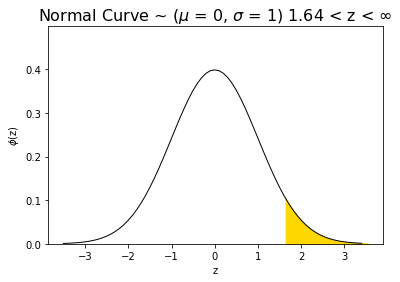

In [2]:
from datascience import plot_normal_cdf
import matplotlib.pyplot as plots
%matplotlib inline
plot_normal_cdf(lbound=1.64)

The observed statistic is: $\hat{p}=\frac{7}{50}=0.14$

z-test:

$$ z  = \frac{\hat{p}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$$

$$  = \frac{0.14-0.07}{\sqrt{\frac{0.07(1-0.07)}{50}}}$$

$$  = \frac{0.07}{0.036}$$

$$  = 1.939$$

The threshold is 1.64. Therefore, 1.939 is clear inside the critical region, where the $H_0$ is rejected. 

In [3]:
se = ((0.07)*(1-0.07)/50)**(1/2)
se

0.03608323710533744

In [4]:
(0.14-0.07)/se

1.9399589841579263

Let's calculate and visualize the p-value: $P(Z>1.939)$

In [5]:
1 - stats.norm.cdf(1.939)

0.026250669079613265

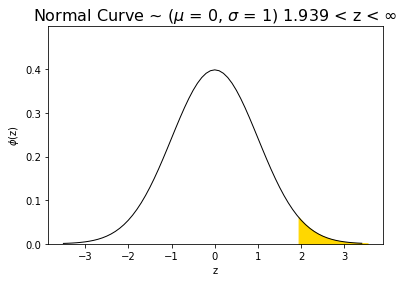

In [6]:
plot_normal_cdf(lbound=1.939)

The p-value is 2.62%. 

#### 7.12) What is the t-statistic and t-test for the mean ($\mu$)?

The t-statistic is the number of estimated standard errors from $\bar{x}$ to $\mu_0$.
 
The t-test uses a t-statistic as the test statistic:

$$ t=  \frac{Deviation\ of\ sample\ statistic\ from\ H_0}{Estimated\ standard\ error\ of\ sample\ statistic}  $$

$$ = \frac{\bar{x}-\mu_0}{\frac{s}{\sqrt{n}}} $$

#### 7.13) In a sample of 36 job applicants, the average years of experience is 1 with standard deviation $s = 3$. Test the null hypothesis $H_0: \mu \ge 2$. Adopt a  level of significance ($\alpha =5\%$)

  Given $\alpha =5\%$, we must get 't' that makes $P(T<t_{n-1})=0.05$ true.

In [7]:
stats.t.ppf(0.05,35)

-1.6895724539637715

Let's visualize $P(T<t_{n-1})=0.05$ in the chart below.

The area on the left of the  red dashed vertical line is exactly 5%. It represents the critical region, where we reject the $H_0$.

Text(-2.2, -0.1, 't=-1.689')

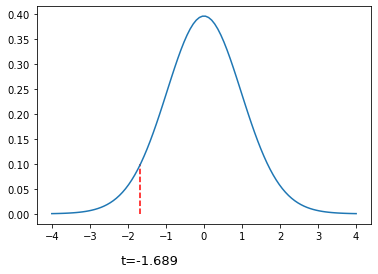

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-4, 4, 100)
plt.plot(x, stats.t(35).pdf(x))
plt.vlines(-1.689, 0, 0.1, colors='red', linestyles='dashed')
plt.text(-2.2, -0.1,'t=-1.689', fontsize=13)

$$ t= \frac{\bar{x}-\mu_0}{\frac{s}{\sqrt{n}}} $$

$$ = \frac{1-2}{\frac{3}{\sqrt{36}}} $$

$$ = \frac{-1}{\frac{1}{2}} $$

$$ = -2 $$

The threshold is -1.689. Therefore, we reject the  $H_0$, as -2 is inside the critical region.

The p-value, $P(T<-2) = 2.66\%$. 

In [9]:
stats.t.cdf(-2, 35)

0.026653825931598388

## Exercises

1| Given the set of hypotheses
and z-test statistic. Find the p-value and determine if the $H_0$ would be rejected at $\alpha = 0.05$?

a) $H_0:p < p_0$ vs $H_a: p>p_0$

 $z=2$

b) $H_a: p<p_0$

 $z=-2$

2| Given the set of hypotheses
and t-test statistic. Find the p-value and determine if the $H_0$ would be rejected at $\alpha = 0.05$?

a) $H_a: \mu>\mu_0$,  $n=11$,  $t=1.91$.

b) $H_a: \mu<\mu_0$,  $n=17$,  $t=-3.45$.

3| A biotech is testing a new drug. If the drug lowers the blood pressure of a patient by more than 12 mm, it is deemed effective. State the natural hypotheses to test in a clinical study of this new drug? Justify.

4| Pfizer tests millions of compounds, before occasionally produce breakthroughs that can lead to multibillion dollar blockbuster drugs like Lipitor and Viagra. Should the managers of the Pfizer be more worried about Type 1 or Type 2 errors?

## Reference

Adhikari, A., DeNero, J. (2020). Computational and Inferential Thinking: The Foundations of Data Science. [Link](https://www.inferentialthinking.com/chapters/intro.html) 

Diez, D. M., Barr, C. D., Ã‡etinkaya-Rundel, M. (2014). Introductory Statistics with Randomization and Simulation. [Link](https://www.openintro.org/stat/textbook.php?stat_book=isrs) 

Lau, S., Gonzalez, J., Nolan, D. (2020). Principles and Techniques of Data Science.  [Link](https://www.textbook.ds100.org/intro) 